In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('total_data_v5.csv', encoding='cp949')

In [ ]:
data = data[(data['분기']>'2017 2Q') & (data['전용면적구간']==2)]
data['temp'] = data['도로명주소'] + '_' + data['전용면적구간'].astype(str)
group = data.groupby(['temp'])['결측치연속'].agg(['max']).reset_index()
to_del = group[group['max']>5]['temp']
data = data[~data['temp'].isin(to_del)]
data.drop('temp', axis=1, inplace=True)
data.shape

(224600, 60)

In [ ]:
data['도'] = data['도로명주소'].apply(lambda x: x.split()[0])
data['시군'] = data['도로명주소'].apply(lambda x: ' '+x.split()[1] if x.split()[1].endswith(('시','군','구')) else '')
data['구'] = data['도로명주소'].apply(lambda x: ' '+x.split()[2] if x.split()[2].endswith('구') else '')
data['지역'] = data['도'] + data['시군'] + data['구']

In [ ]:
data = data[['아파트명', '분기', '거래량', '전용면적합', '거래금액합', '단위면적당거래금액', '평균거래금액', '조정대상지구', '투기지역', '투기과열지구', '도', '시군', '구', '지역']]

In [ ]:
def policy_plot(start, end, target_col, show_df=False):
    target_data = data[(data['분기']>=start) & (data['분기']<=end)]
    target_data[target_col+'여부'] = target_data['지역'].isin(target_data[target_data[target_col]==1]['지역'].unique())
    length = target_data['분기'].nunique()

    group = target_data.groupby([target_col+'여부','분기'])[['거래량', '전용면적합', '거래금액합']].agg('sum').reset_index()
    group['단위면적당거래금액'] = group['거래금액합'] / group['전용면적합']
    cols = ['거래량', '단위면적당거래금액']
    for col in cols: group['기준분기 대비 '+col] =  group[col] / np.array([group.loc[0,col]]*length + [group.loc[length,col]]*length)

    fig, axes = plt.subplots(1,3,figsize=(13,3))
    pcols = ['기준분기 대비 '+col for col in cols]
    for i in range(2):
        ax=axes[i]
        sns.lineplot(x='분기', y=pcols[i], hue=target_col+'여부', hue_order=[True, False], data=group, ax=ax)
        ax.legend(bbox_to_anchor=(1,1))
        for s in ['top', 'right']: ax.spines[s].set_visible(False)

    group = target_data[target_data[target_col+'여부']==1].groupby(['지역', '분기'])[['거래량', '전용면적합', '거래금액합']].agg('sum').reset_index()
    group['단위면적당거래금액'] = group['거래금액합'] / group['전용면적합']
    for col in cols:
        group['기준분기 대비 '+col] =  group[col] / np.array([[group.loc[i*length,col]]*length for i in range(group['지역'].nunique())]).flatten()
    group = group[group['분기']==end][['지역']+cols+pcols].sort_values(pcols[1], ascending=False)

    if show_df: display(group)

    ax=axes[2]
    x,y=pcols
    sns.scatterplot(x=x, y=y, data=group, ax=ax)
    ax.set_ylim((0,max(group[y].max()+0.1, 2)))
    ax.set_xlim((0,max(group[x].max()+0.1, 2)))
    ax.axvline(1, c='red')
    ax.axhline(1, c='red')
    for s in ['top', 'right']: ax.spines[s].set_visible(False)
    plt.tight_layout();


### 2017 3Q ~ 2018 3Q

규제 지역들이 상대적으로 거래량도 늘었고, 가격도 증가했다

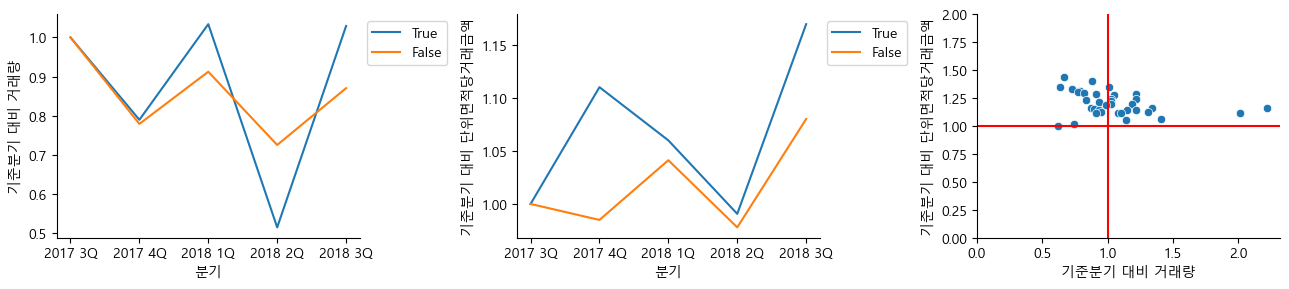

In [ ]:
policy_plot('2017 3Q', '2018 3Q', '조정대상지구')

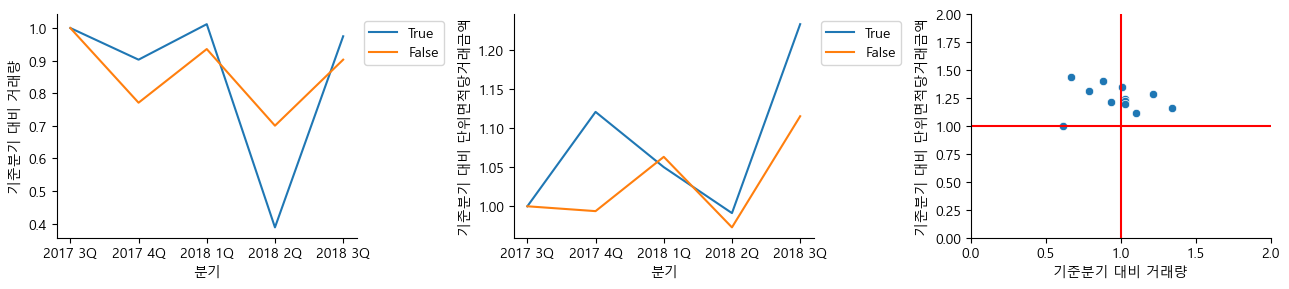

In [ ]:
policy_plot('2017 3Q', '2018 3Q', '투기지역')

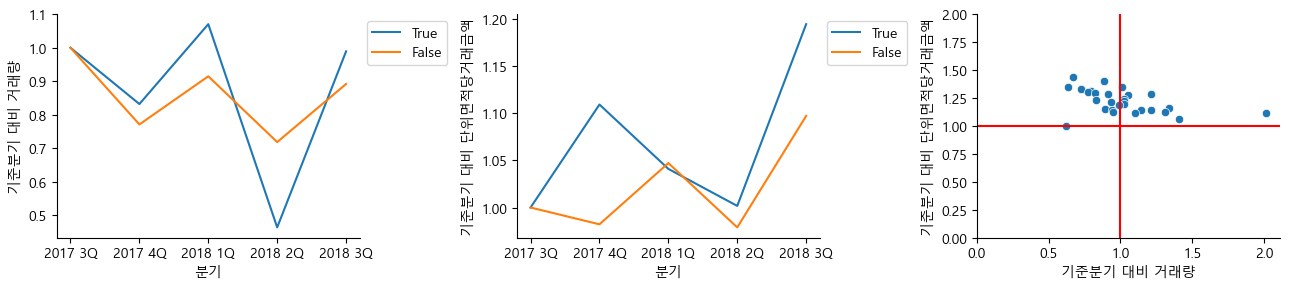

In [ ]:
policy_plot('2017 3Q', '2018 3Q', '투기과열지구')

### 2018 4Q ~ 2019 3Q

,지역,거래량,단위면적당거래금액,기준분기 대비 거래량,기준분기 대비 단위면적당거래금액
35,경기도 성남시 수정구,120.0,936.962818,6.000000,1.389765
155,서울시 송파구,606.0,1641.331523,7.390244,1.349374
175,서울시 종로구,39.0,1294.717106,4.875000,1.298190
43,경기도 수원시 영통구,436.0,565.614314,0.824197,1.218773
139,서울시 서대문구,291.0,953.589932,4.546875,1.218307
19,경기도 광명시,227.0,732.777810,5.404762,1.187314
115,서울시 금천구,121.0,639.625203,2.630435,1.169035
111,서울시 구로구,301.0,765.619527,4.492537,1.168015
91,서울시 강동구,366.0,1008.547338,7.320000,1.149540
87,서울시 강남구,270.0,2148.088985,7.500000,1.147967


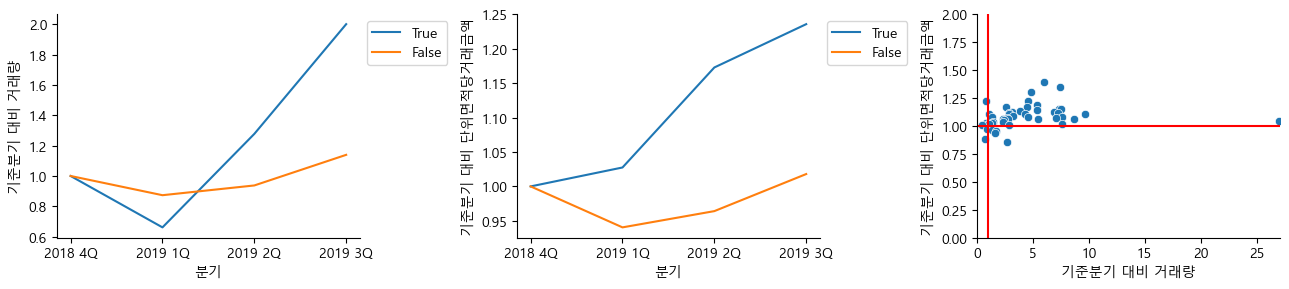

In [ ]:
policy_plot('2018 4Q', '2019 3Q', '조정대상지구', show_df=True)

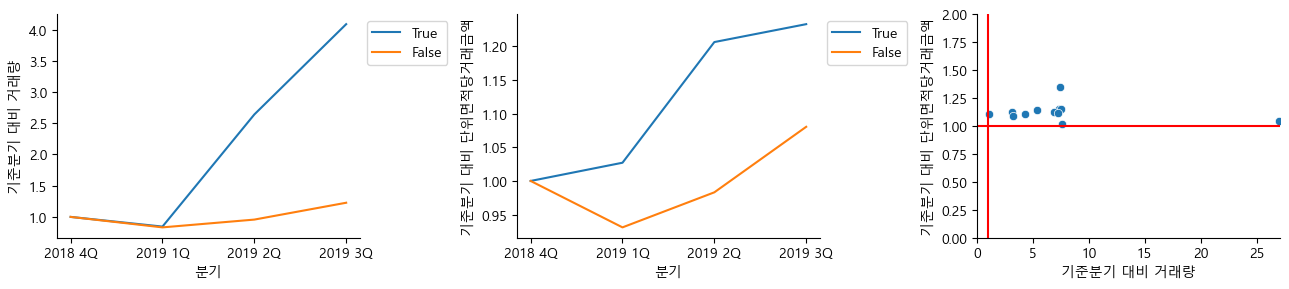

In [ ]:
policy_plot('2018 4Q', '2019 3Q', '투기지역')

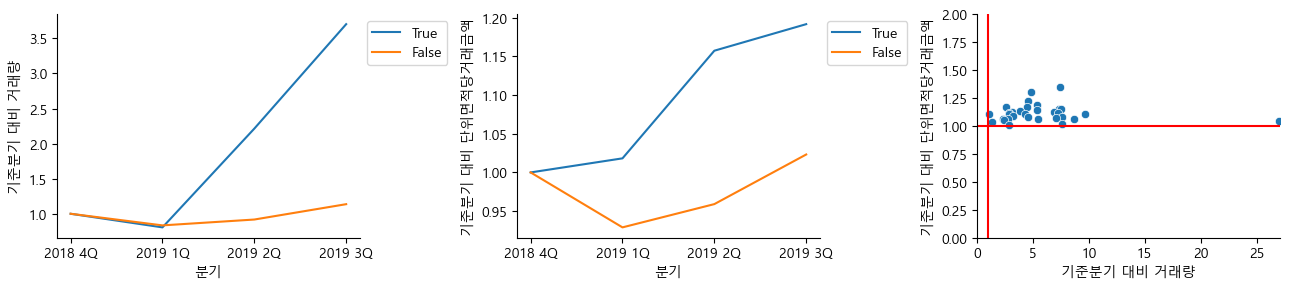

In [ ]:
policy_plot('2018 4Q', '2019 3Q', '투기과열지구')

### 2019 4Q ~ 2020 1Q

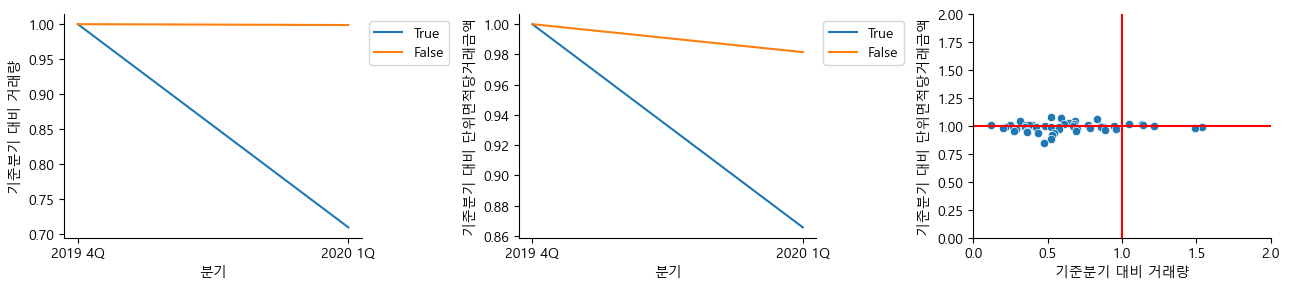

In [ ]:
policy_plot('2019 4Q', '2020 1Q', '조정대상지구')

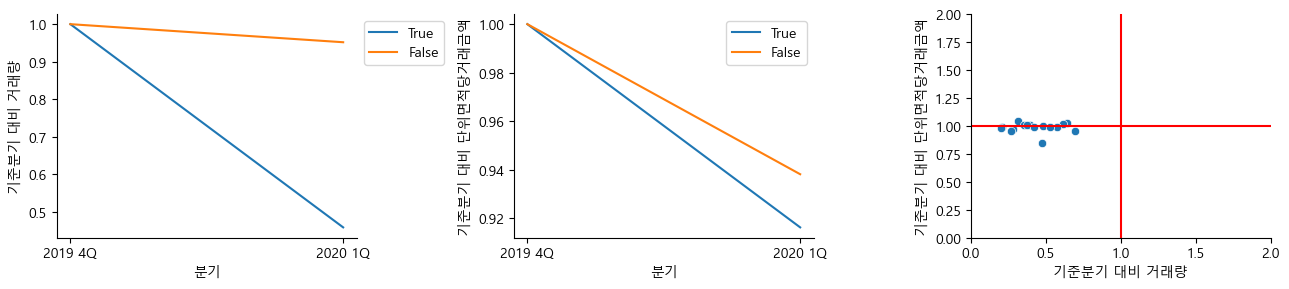

In [ ]:
policy_plot('2019 4Q', '2020 1Q', '투기지역')

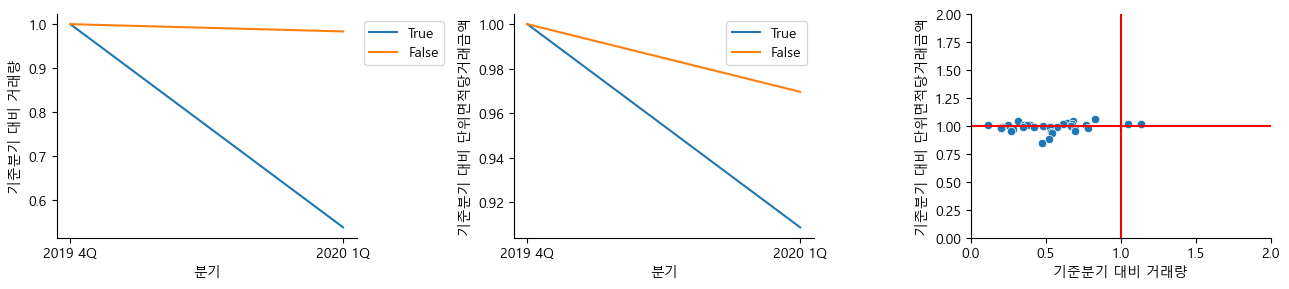

In [ ]:
policy_plot('2019 4Q', '2020 1Q', '투기과열지구')

### 2020 2Q ~ 2020 4Q

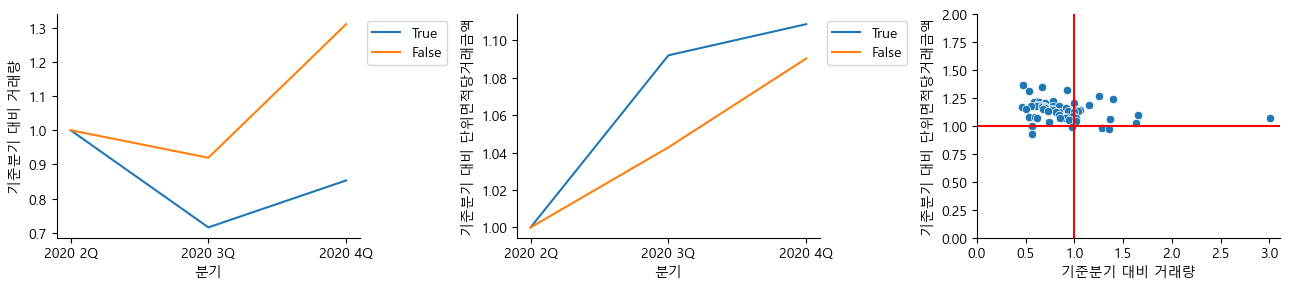

In [ ]:
policy_plot('2020 2Q', '2020 4Q', '조정대상지구')

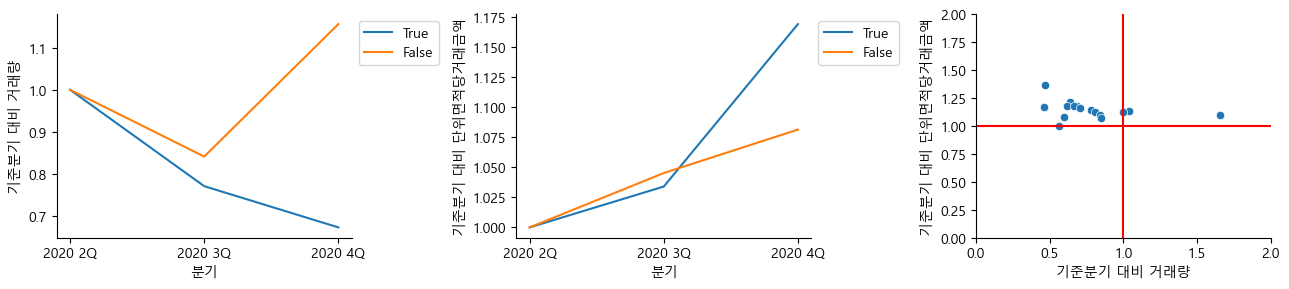

In [ ]:
policy_plot('2020 2Q', '2020 4Q', '투기지역')

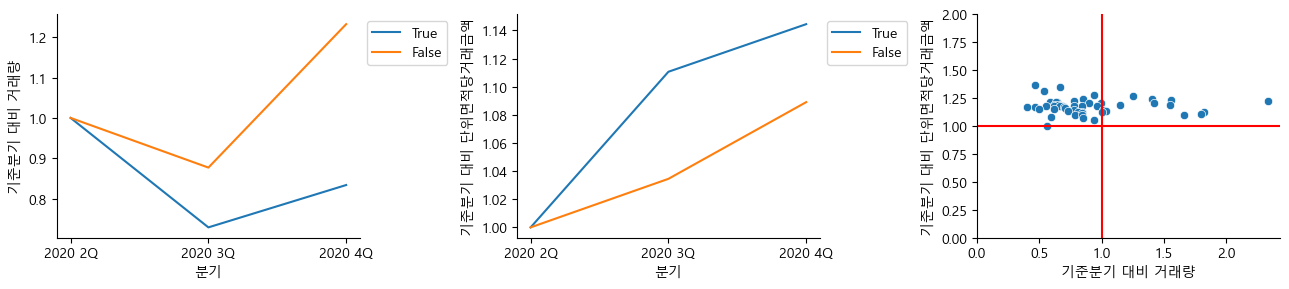

In [ ]:
policy_plot('2020 2Q', '2020 4Q', '투기과열지구')

### 2021 1Q ~ 2021 3Q

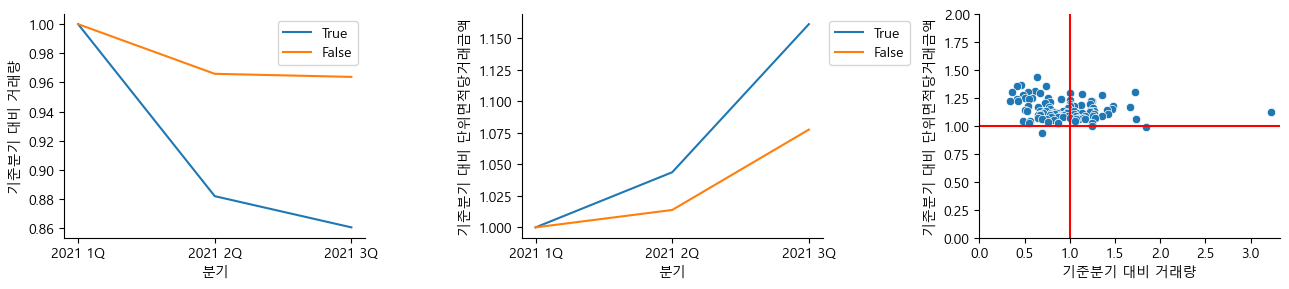

In [ ]:
policy_plot('2021 1Q', '2021 3Q', '조정대상지구')

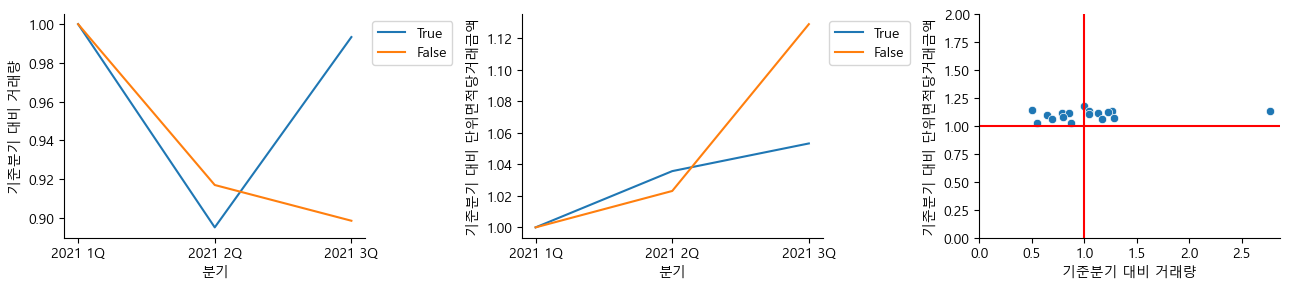

In [ ]:
policy_plot('2021 1Q', '2021 3Q', '투기지역')

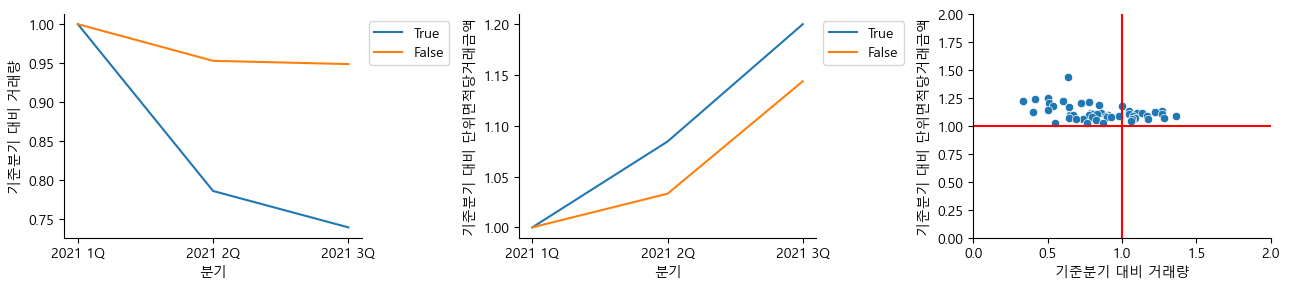

In [ ]:
policy_plot('2021 1Q', '2021 3Q', '투기과열지구')

### 2021 4Q ~ 2022 3Q

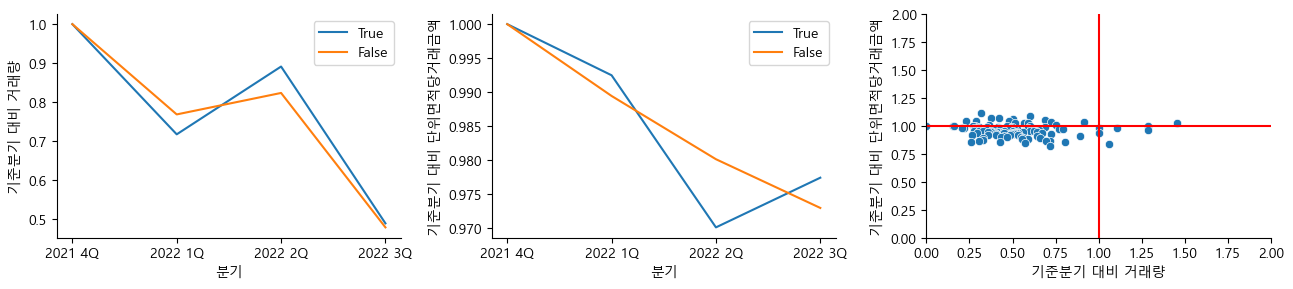

In [ ]:
policy_plot('2021 4Q', '2022 3Q', '조정대상지구')

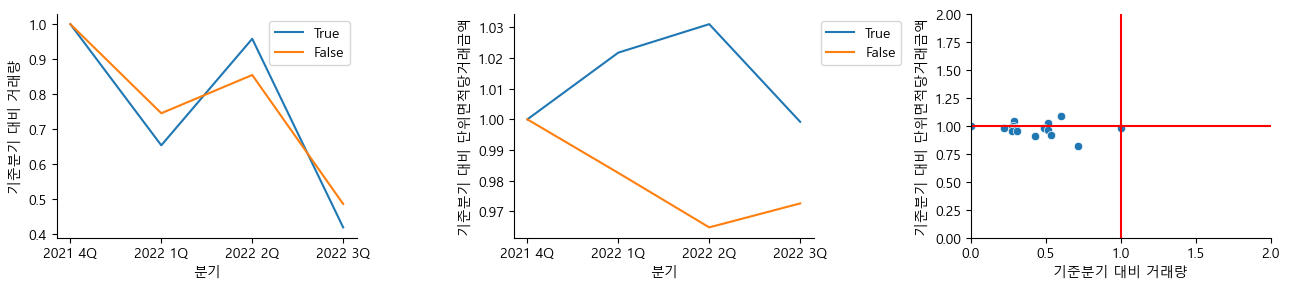

In [ ]:
policy_plot('2021 4Q', '2022 3Q', '투기지역')

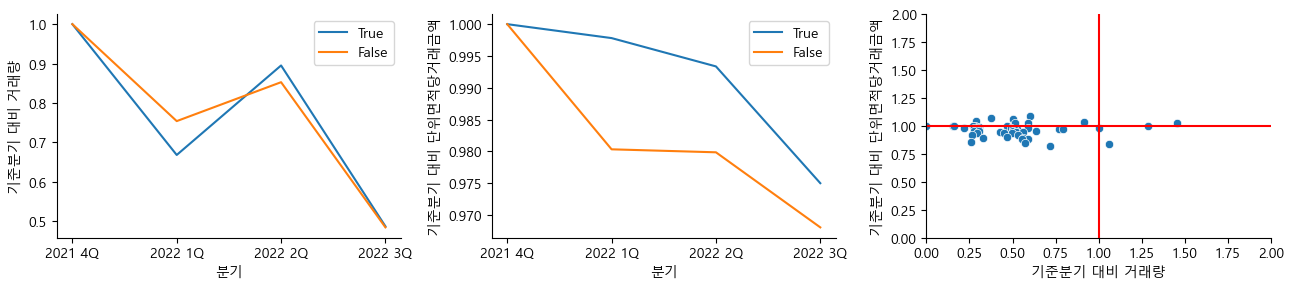

In [ ]:
policy_plot('2021 4Q', '2022 3Q', '투기과열지구')